In [51]:
# Import for Exploratory Data Analysis - EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Imports for Text Analysis
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

# Importing libraries necessary for Model Building and Training
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# import warnings
# warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1.	numpy (np) provides powerful array manipulation capabilities. It's often used for numerical computations in data analysis.
2.	pandas (pd) is essential for data manipulation and analysis.
3.	matplotlib.pyplot (plt) is the foundation for creating static visualizations in Python.
4.	seaborn (sns) builds on top of matplotlib to provide a more high-level interface for creating statistical graphics.
5.	string provides access to string manipulation functions, potentially useful for cleaning text data.
6.	The Natural Language Toolkit (NLTK) provides functionalities for working with text data. Here, it's used for downloading stop words.
7.	stopwords provides a list of common stop words (e.g., "the", "a", "an") that you might want to remove from text data before analysis.
8.	wordcloud helps create visual representations of word frequencies, providing insights into the most common words within your text data.
9.	tensorflow (tf) is a popular framework for building and training machine learning models.
10.	keras is a high-level API built on top of TensorFlow, simplifying the process of building neural networks.
11.	Tokenizer helps convert text data into numerical sequences, a format suitable for machine learning models.
12.	pad_sequences ensures all sequences in your data have the same length,  important for training neural networks.
13.	train_test_split helps split your data into training and testing sets, crucial for evaluating the performance of your machine learning model.
14.	EarlyStopping helps prevent overfitting by stopping the training process when the model's performance on a validation set stops improving.
15.	ReduceLROnPlateau helps improve model convergence by reducing the learning rate when the model's performance on a validation set plateaus.
16.	warnings allows you to suppress warnings that might clutter your output. However, it's generally recommended to address warnings rather than simply hiding them.


In [52]:
data = pd.read_csv('emails.csv')
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [53]:
data.shape

(5172, 3002)

To check how many data we have let’s print the shape of the data frame.

In [54]:
print(data.columns)

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)


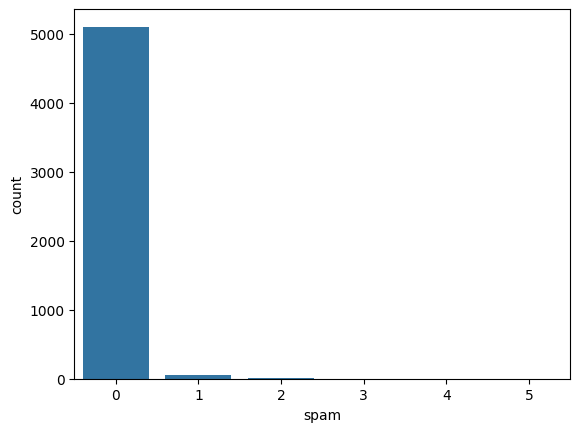

In [55]:
if 'spam' in data.columns:
    sns.countplot(x='spam', data=data)
    plt.show()
else:
    print("The column does not exist in the data.")

shows if a dataset contains a column named "spam" and then creates a visualization  of its content if it does

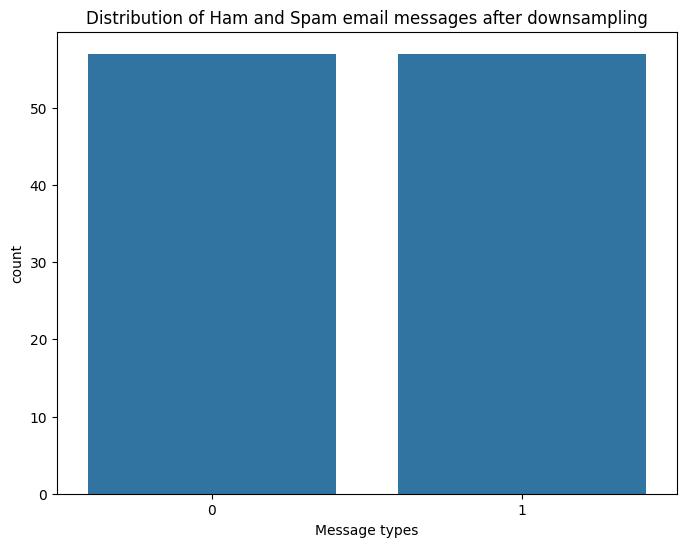

In [56]:
# Assuming 'data' is your DataFrame and it has been loaded correctly
# Downsampling to balance the dataset
ham_msg = data[data['spam'] == 0]
spam_msg = data[data['spam'] == 1]
ham_msg = ham_msg.sample(n=len(spam_msg), random_state=42)

# Using pd.concat to concatenate DataFrames
balanced_data = pd.concat([ham_msg, spam_msg]).reset_index(drop=True)

# Plotting the counts of downsampled dataset
plt.figure(figsize=(8, 6))
sns.countplot(data=balanced_data, x='spam')
plt.title('Distribution of Ham and Spam email messages after downsampling')
plt.xlabel('Message types')
plt.show()

In [57]:
# Convert the 'text' column to string type before using .str accessor
balanced_data['text'] = balanced_data['text'].astype(str).fillna('').str.replace('Subject', '')
print(balanced_data['text'].head())
print(balanced_data['text'].dtype)

0    0
1    0
2    0
3    0
4    0
Name: text, dtype: object
object


cleans the text data in the 'text' column by removing any leading or trailing instances of the word "Subject".

In [58]:
punctuations_list = string.punctuation
def remove_punctuations(text):
	temp = str.maketrans('', '', punctuations_list)
	return text.translate(temp)

balanced_data['text']= balanced_data['text'].apply(lambda x: remove_punctuations(x))
balanced_data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 4495,0,0,1,1,2,2,7,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 591,14,3,11,6,8,1,56,3,4,...,0,0,0,0,0,0,0,1,0,0
2,Email 558,3,3,1,1,2,1,27,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 229,0,1,2,0,1,0,13,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Email 1335,0,0,1,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


 remove punctuation marks from the text data in the "text" column, potentially improving the quality of the data for spam detection algorithms that might focus on the content of the message itself.

In [59]:
balanced_data['text'] = balanced_data['text'].astype(str)

In [60]:
def remove_stopwords(text):
	stop_words = stopwords.words('english')

	imp_words = []

	# Storing the important words
	for word in str(text).split():
		word = word.lower()

		if word not in stop_words:
			imp_words.append(word)

	output = " ".join(imp_words)
	return output

balanced_data['text'] = balanced_data['text'].apply(lambda text: remove_stopwords(text))
balanced_data.head()


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 4495,0,0,1,1,2,2,7,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 591,14,3,11,6,8,1,56,3,4,...,0,0,0,0,0,0,0,1,0,0
2,Email 558,3,3,1,1,2,1,27,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 229,0,1,2,0,1,0,13,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Email 1335,0,0,1,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# Check if there are any empty or invalid entries
print(balanced_data[balanced_data['text'].str.strip() == ''].shape)


(0, 3002)


 define a function remove_stopwords to remove common English stop words from text data and applies it to the "text" column in the balanced_data DataFrame.

In [64]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    imp_words = []

    # Handle the case where text might be empty or None
    if text is None:
        return ""

    # Storing the important words
    for word in str(text).split():
        word = word.lower()
        if word not in stop_words:
            imp_words.append(word)

    # Return a string even if no important words are found
    return " ".join(imp_words)

# Apply the updated remove_stopwords function
balanced_data['text'] = balanced_data['text'].apply(lambda text: remove_stopwords(text))

 Define a function plot_word_cloud to visualize the most frequent words in a text corpus using a word cloud, and then creates separate word clouds for spam and non-spam emails in your balanced_data DataFrame.

In [65]:
#train test split
train_X, test_X, train_Y, test_Y = train_test_split(balanced_data['text'],
													balanced_data['spam'],
													test_size = 0.2,
													random_state = 42)

This code splits your preprocessed text data (features) and corresponding spam labels (target variables) into separate training and testing sets. The training set (80% of the data) will be used to train a machine learning model to identify spam emails, while the testing set (20% of the data) will be used to evaluate the model's performance on unseen data.

In [66]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)

# Pad sequences to have the same length
max_len = 100 # maximum sequence length
train_sequences = pad_sequences(train_sequences,
								maxlen=max_len,
								padding='post',
								truncating='post')
test_sequences = pad_sequences(test_sequences,
							maxlen=max_len,
							padding='post',
							truncating='post')

This code transforms your text data from email messages into sequences of numbers suitable for machine learning models. The tokenizer creates a mapping between words and numbers, and the padding step ensures all sequences have a consistent length for model processing.

In [67]:
# Build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1,
									output_dim=32,
									input_length=max_len))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Build a neural network architecture specifically designed for text classification. The Embedding layer transforms the text sequences into numerical representations, the LSTM layer captures sequential information within the email messages, and the final layers with appropriate activation functions make predictions for spam or non-spam classification

In [68]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
			metrics = ['accuracy'],
			optimizer = 'adam')

Compiles the Keras model, the loss function used to measure how well the model's predictions match the actual labels, then calculates the binary cross-entropy loss between the predicted probabilities (between 0 and 1) and the true labels (0 for non-spam, 1 for spam). The accuracy is the metrics you want to monitor during training and evaluation.  The Adam optimizer is a popular choice that often finds good minima in the loss function, leading to better model performance.

In [69]:
es = EarlyStopping(patience=3,
				monitor = 'val_accuracy',
				restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
					monitor = 'val_loss',
					factor = 0.5,
					verbose = 0)
# Train the model
history = model.fit(train_sequences, train_Y,
					validation_data=(test_sequences, test_Y),
					epochs=10,
					batch_size=32,
					callbacks = [lr, es]
				)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:681: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - accuracy: 0.4855 - loss: 0.6934 - val_accuracy: 0.5217 - val_loss: 0.6930 - learning_rate: 0.0010
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5090 - loss: 0.6933 - val_accuracy: 0.5217 - val_loss: 0.6929 - learning_rate: 0.0010
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4894 - loss: 0.6933 - val_accuracy: 0.5217 - val_loss: 0.6930 - learning_rate: 0.0010
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4816 - loss: 0.6933 - val_accuracy: 0.5217 - val_loss: 0.6931 - learning_rate: 5.0000e-04


EarlyStopping callback object is a technique to prevent overfitting by stopping the training process when the model's performance on a validation set (not used for training) stops improving for a certain number of epochs (iterations).
 The a ReduceLROnPlateau callback object helps prevent the model from getting stuck in local minima during training.

In [70]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5217 - loss: 0.6930
Test Loss : 0.6929761171340942
Test Accuracy : 0.52173912525177


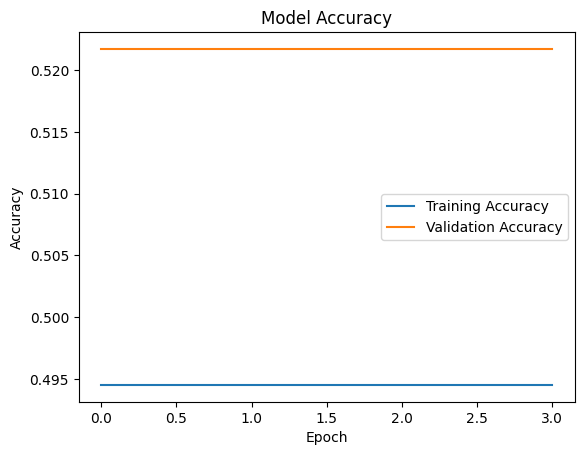

In [71]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Analyze the training process by visualizing how the model's accuracy improves on both the training data and the validation data. Ideally, the training accuracy should increase, and the validation accuracy should also increase or at least stay stable to avoid overfitting.